In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from skimpy import skim

In [2]:
df = pd.read_csv('/Users/cantu/Documents/Data Science Masters/Applied DS DSC680 /Project 3/Online Sales Data.csv')
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


# Intitial exploration 

In [4]:
# Lets see how many rows are empty
print(df.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [5]:
#Replace spaces in column names with '_'
df.columns = df.columns.str.replace(' ', '_')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product_Category  240 non-null    object 
 3   Product_Name      240 non-null    object 
 4   Units_Sold        240 non-null    int64  
 5   Unit_Price        240 non-null    float64
 6   Total_Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment_Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
# date to date time 
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# general summary
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 240    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Transaction_ID    │   0 │      0 │   10120 │  69.43 │  10000 │  10060 │  10120 │  10180 │  10240 │ ▇▇▇▇▇▇  │  │
│ │ Units_Sold        │   0 │      0 │   2.158 │  1.322 │      1 │      1 │      2 │      3 │     10 │   ▇▂▁   │  │
│ │ Unit_Price        │   0 │      0 │   236.4 │  429.4 │    6.5 │   29.5 │  89.99 │    250 │   3900 │    ▇    │  │
│ │ Total_Revenue     │   0 │      0 │   335.7 │  485.8 │    6.5 │  62.97 │    180 │  399.2 │   3900 │   ▇▁    │  │
│ └───────────────────┴─────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                   │      0 │         0 │     2024-01-01      │     2024-08-27      │ D                │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product_Category                 │      0 │         0 │                        1.3 │                   320 │  │
│ │ Product_Name                     │      0 │         0 │                        4.4 │                  1057 │  │
│ │ Region                           │      0 │         0 │                        1.3 │                   320 │  │
│ │ Payment_Method                   │      0 │         0 │                        1.7 │                   400 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [9]:
# Find the toal revenue 
revenue_sum = df['Total_Revenue'].sum()
print(revenue_sum)

80567.84999999999


# EDA

find the most profitable month
what category has the most units sold or most popular 
what category is most profitable 


## What month is the most profitable? 

In [13]:
# profit by month 
profit_by_month = df.groupby(df['Date'].dt.to_period('M'))['Total_Revenue'].sum()
print(profit_by_month)

Date
2024-01    14548.32
2024-02    10803.37
2024-03    12849.24
2024-04    12451.69
2024-05     8455.49
2024-06     7384.55
2024-07     6797.08
2024-08     7278.11
Freq: M, Name: Total_Revenue, dtype: float64


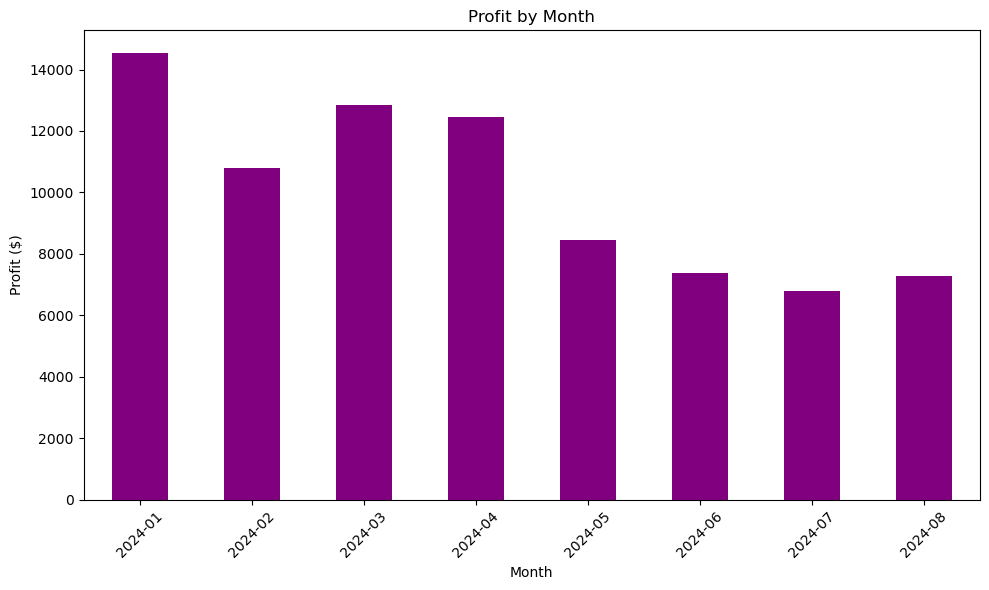

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
profit_by_month.plot(kind='bar', color='purple')
plt.title('Profit by Month')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## What category has the most units sold? 

In [16]:
# groub units by category 
units_by_category = df.groupby('Product_Category')['Units_Sold'].sum() 
# find the catgorys 
cats_most_sold = units_by_category.idxmax()
max_units_sold = units_by_category.max()

print(f"The Product Category with the most units sold is '{cats_most_sold}' with {max_units_sold} units sold.")



The Product Category with the most units sold is 'Clothing' with 145 units sold.


In [57]:
print(units_by_category)

Product_Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units_Sold, dtype: int64


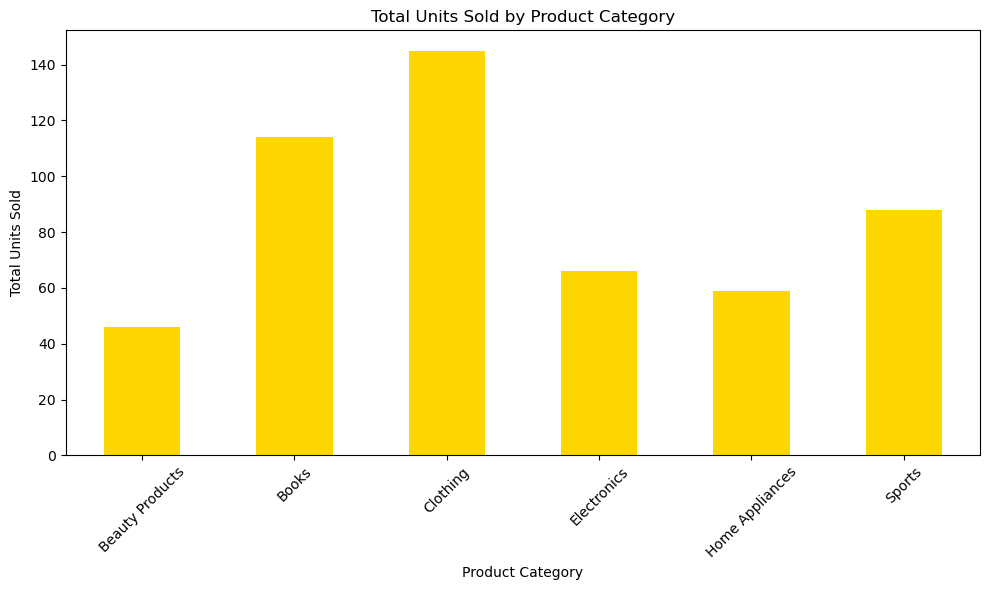

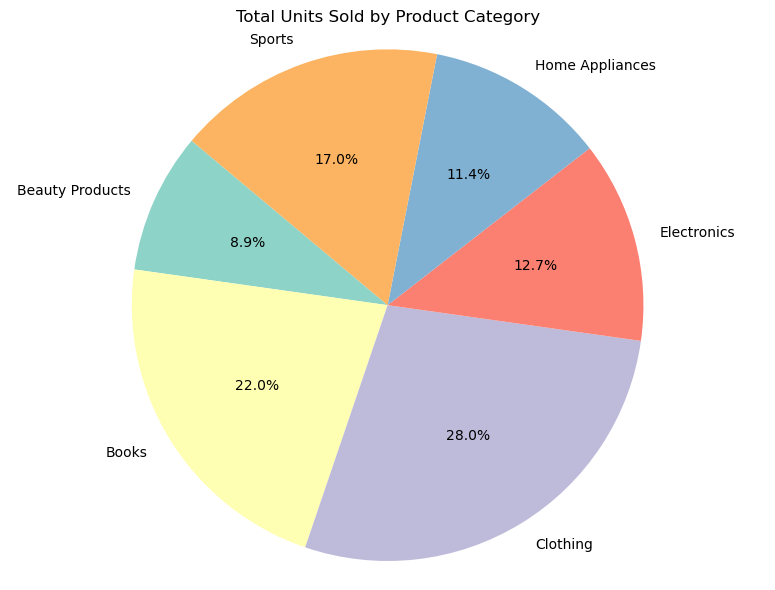

In [59]:
# Plotting
# Bar
plt.figure(figsize=(10, 6))
units_by_category.plot(kind='bar', color='gold')
plt.title('Total Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Pie

plt.figure(figsize=(8, 6))
plt.pie(units_by_category, labels=units_by_category.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Total Units Sold by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## What category is most profitable?

In [19]:
# Groupe by category and sum of revenue
revenue_by_category = df.groupby('Product_Category')['Total_Revenue'].sum() 
# find the category with the highest total revenue
category_most_profitable = revenue_by_category.idxmax()
max_profit = revenue_by_category.max()

print(f"The most profitable Product Category is '{category_most_profitable}' with total revenue of ${max_profit:.2f}.")


The most profitable Product Category is 'Electronics' with total revenue of $34982.41.


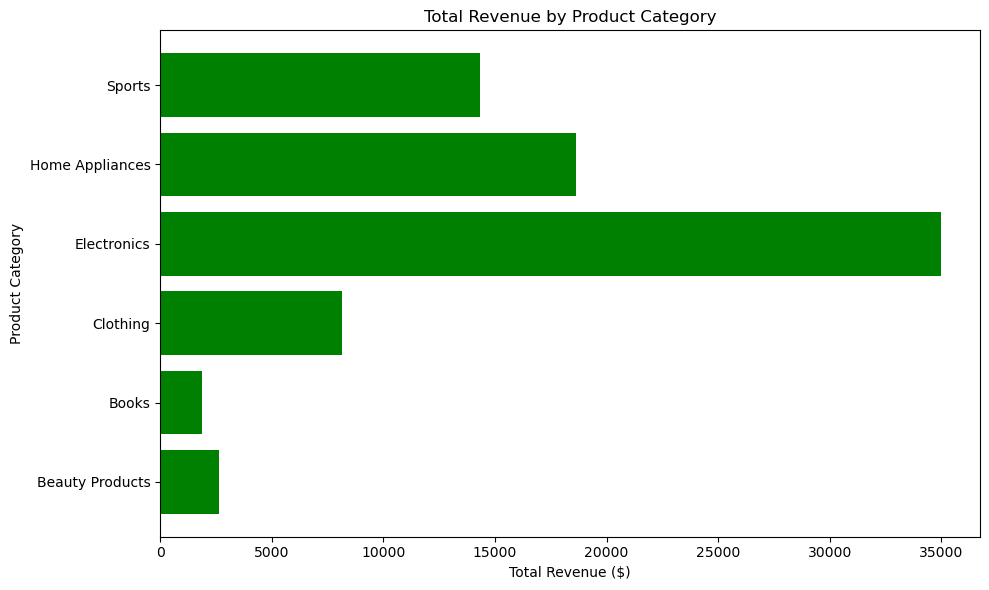

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(revenue_by_category.index, revenue_by_category, color='green')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


# Model

A sales segmintation  model 



## feature engineering 

In [24]:
# calculate total spending per customer
total_spending = df.groupby('Transaction_ID')['Total_Revenue'].sum().reset_index()
total_spending.rename(columns={'Total_Revenue': 'Total_Spending'}, inplace=True)

# calculate number of transactions per customer
num_transactions = df.groupby('Transaction_ID').size().reset_index(name='Number_of_Transactions') # Counts each transaction per customer then makes a new column for total transactions 

# calculate average purchase value per customer
avg_purchase_value = df.groupby('Transaction_ID')['Total_Revenue'].mean().reset_index()
avg_purchase_value.rename(columns={'Total_Revenue': 'Average_Purchase_Value'}, inplace=True)

# product catEgory preferences one-hot encoding
product_categories = pd.get_dummies(df[['Transaction_ID', 'Product_Category']], columns=['Product_Category']) # Dummy variable  breaks down categories for clustering.  
product_categories = product_categories.groupby('Transaction_ID').sum().reset_index()

# mcerge all features 
customer_features = pd.merge(total_spending, num_transactions, on='Transaction_ID')
customer_features = pd.merge(customer_features, avg_purchase_value, on='Transaction_ID')
customer_features = pd.merge(customer_features, product_categories, on='Transaction_ID')



# display the engineered features
customer_features.head()


,Transaction_ID,Total_Spending,Number_of_Transactions,Average_Purchase_Value,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports
0,10001,1999.98,1,1999.98,0,0,0,1,0,0
1,10002,499.99,1,499.99,0,0,0,0,1,0
2,10003,209.97,1,209.97,0,0,1,0,0,0
3,10004,63.96,1,63.96,0,1,0,0,0,0
4,10005,89.99,1,89.99,1,0,0,0,0,0


In [25]:
from sklearn.preprocessing import StandardScaler

# select numerical features for scaling
numerical_features = ['Total_Spending', 'Number_of_Transactions', 'Average_Purchase_Value']

# initialize scaler
scaler = StandardScaler()

# Fit and transform the numerical features
customer_features[numerical_features] = scaler.fit_transform(customer_features[numerical_features])

# display the scaled features
customer_features.head()

,Transaction_ID,Total_Spending,Number_of_Transactions,Average_Purchase_Value,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports
0,10001,3.432984,0.0,3.432984,0,0,0,1,0,0
1,10002,0.338889,0.0,0.338889,0,0,0,0,1,0
2,10003,-0.259347,0.0,-0.259347,0,0,1,0,0,0
3,10004,-0.560529,0.0,-0.560529,0,1,0,0,0,0
4,10005,-0.506835,0.0,-0.506835,1,0,0,0,0,0


In [26]:
# adding 'Region' as categorical feature, encode it
region_encoded = pd.get_dummies(df['Region'], prefix='Region')
customer_features = pd.concat([customer_features, region_encoded], axis=1)

# drop unnecessary column 'Transaction_ID' not needed for clustering we dont need an identifier
customer_features.drop(columns=['Transaction_ID'], inplace=True)

# display the final  features 
customer_features.head()

,Total_Spending,Number_of_Transactions,Average_Purchase_Value,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North America
0,3.432984,0.0,3.432984,0,0,0,1,0,0,False,False,True
1,0.338889,0.0,0.338889,0,0,0,0,1,0,False,True,False
2,-0.259347,0.0,-0.259347,0,0,1,0,0,0,True,False,False
3,-0.560529,0.0,-0.560529,0,1,0,0,0,0,False,False,True
4,-0.506835,0.0,-0.506835,1,0,0,0,0,0,False,True,False


In [47]:
from sklearn.cluster import KMeans

# initialize K-means clustering with a chosen number of clusters 
k = 4  #  4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit k-means to the data excluding categorical features
clustering_features = customer_features.drop(columns=['Region_Asia', 'Region_Europe', 'Region_North America'])
kmeans.fit(clustering_features)

# get cluster labels
cluster_labels = kmeans.labels_

# add cluster labels to the customer_features 
customer_features['Cluster'] = cluster_labels

#  rows with cluster labels
customer_features.head()

/Users/cantu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Total_Spending,Number_of_Transactions,Average_Purchase_Value,Product_Category_Beauty Products,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Sports,Region_Asia,Region_Europe,Region_North America,Cluster
0,3.432984,0.0,3.432984,0,0,0,1,0,0,False,False,True,3
1,0.338889,0.0,0.338889,0,0,0,0,1,0,False,True,False,1
2,-0.259347,0.0,-0.259347,0,0,1,0,0,0,True,False,False,0
3,-0.560529,0.0,-0.560529,0,1,0,0,0,0,False,False,True,0
4,-0.506835,0.0,-0.506835,1,0,0,0,0,0,False,True,False,0


In [51]:
# cluster characteristics 
cluster_means = customer_features.groupby('Cluster').mean()
print(cluster_means)

# cluster sizes
cluster_sizes = customer_features['Cluster'].value_counts()
cluster_sizes

         Total_Spending  Number_of_Transactions  Average_Purchase_Value  \
Cluster                                                                   
0             -0.515718                     0.0               -0.515718   
1             -0.027199                     0.0               -0.027199   
2              1.548393                     0.0                1.548393   
3              4.565450                     0.0                4.565450   

         Product_Category_Beauty Products  Product_Category_Books  \
Cluster                                                             
0                                0.342105                0.350877   
1                                0.010204                0.000000   
2                                0.000000                0.000000   
3                                0.000000                0.000000   

         Product_Category_Clothing  Product_Category_Electronics  \
Cluster                                                           

Cluster
0    114
1     98
2     22
3      6
Name: count, dtype: int64

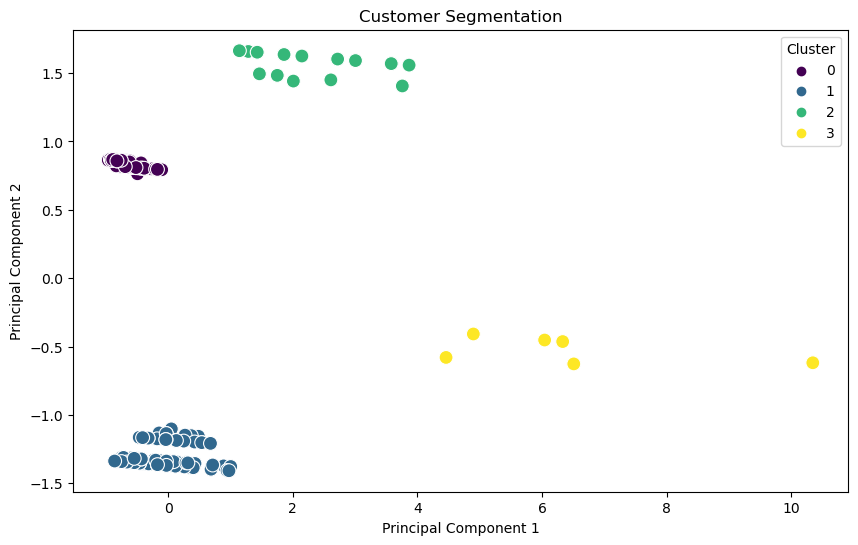

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA to reduce the dimensionality 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_features)

# cluster labels to the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Interpretation of Clusters
Cluster Characteristics:
Cluster 0:

Moderate spending and average purchase value.
Preferences towards Beauty Products, Books, Clothing.
Region distribution across Asia, Europe, and North America.
Cluster 1:

Lower spending and average purchase value.
Strong preferences towards Home Appliances and Sports.
Predominantly located in Asia and Europe.
Cluster 2:

High spending and average purchase value.
Strong preference towards Electronics.
Dominantly located in North America.
Cluster 3:

Very high spending and average purchase value.
Strong preference towards Electronics and Home Appliances.
Even distribution across Asia, Europe, and North America.
Cluster Sizes:
Cluster 0: 114 customers
Cluster 1: 98 customers
Cluster 2: 22 customers
Cluster 3: 6 customers

## Actionable Insights:
Based on the characteristics of each cluster, here are some actionable insights:

Cluster 0 (Moderate Spenders, Diverse Preferences):

Targeted marketing campaigns focusing on Beauty Products, Books, and Clothing could resonate well.
Implement personalized recommendations based on previous purchases in these categories.
Cluster 1 (Lower Spenders, Home Appliances & Sports Enthusiasts):

Offer promotions or discounts on Home Appliances and Sports products to capitalize on their preferences.
Consider strategies to increase average purchase value through bundling or cross-selling.
Cluster 2 (High Spenders, Electronics Enthusiasts):

Focus on maintaining customer loyalty and satisfaction in Electronics.
Launch new product lines or exclusive offers to further engage this customer segment.
Cluster 3 (Very High Spenders, Electronics & Home Appliances):

Provide personalized VIP treatment and exclusive offers to strengthen loyalty.
Gather feedback to understand their needs and preferences better, potentially leading to premium service offerings.

# Next Steps:
Targeted Marketing: Tailor marketing strategies and promotional offers based on each cluster's preferences and spending behavior.
Product Development: Use insights to develop new products or improve existing ones that cater to specific cluster preferences.
Customer Engagement: Implement personalized customer service initiatives to enhance satisfaction and retention.